# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:27:19.886883: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:27:23.236938
2025-04-14 19:27:23.236938


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:27:16"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

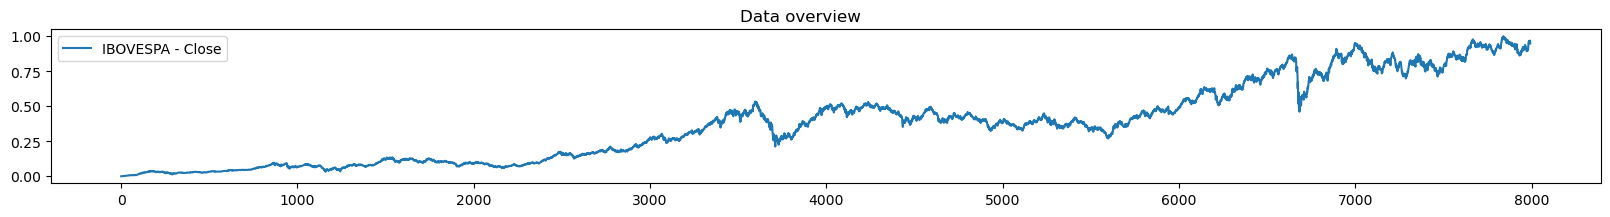

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

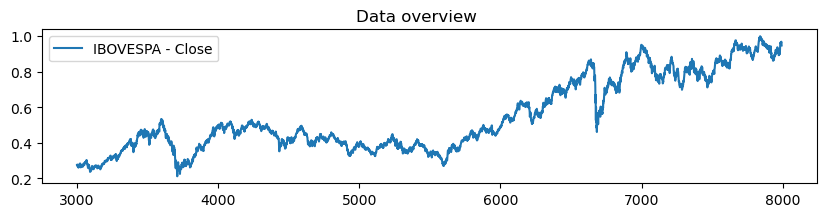

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

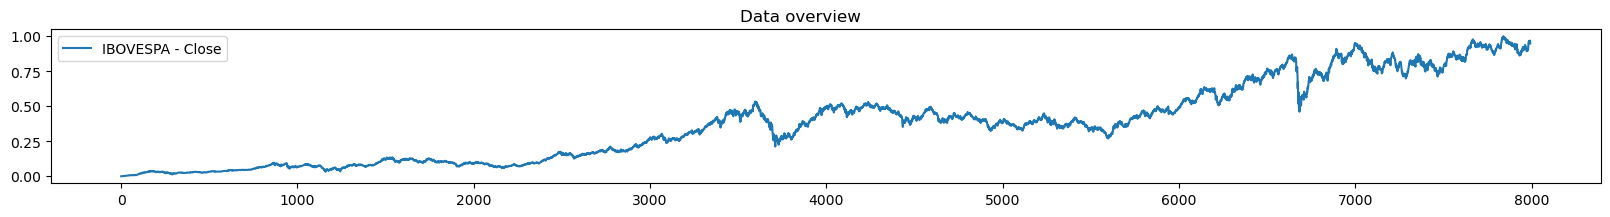

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

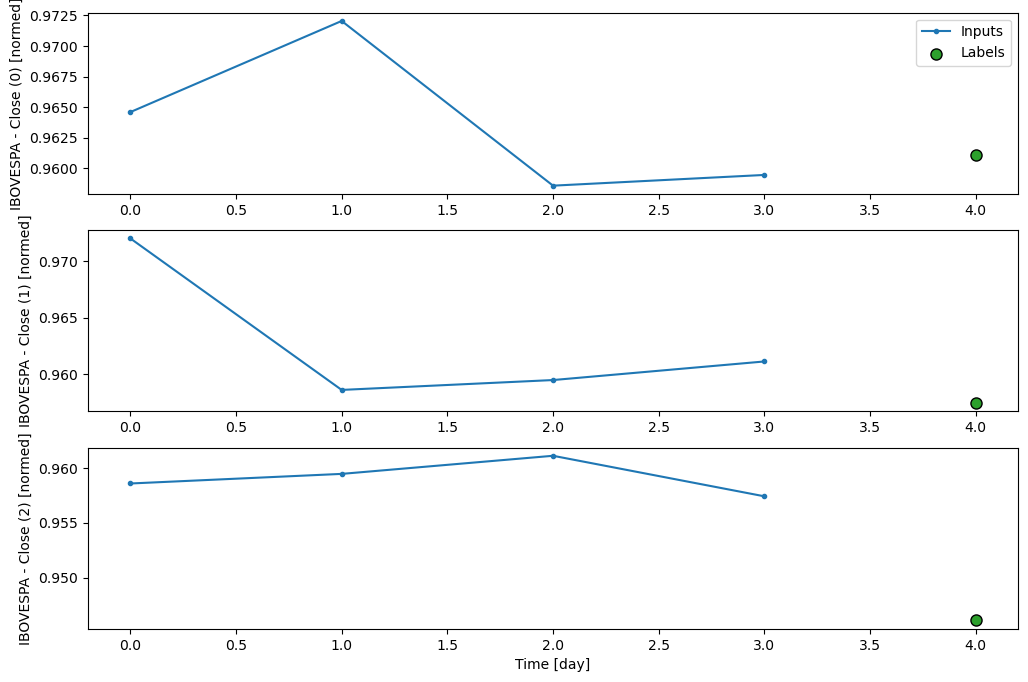

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 19:24 5s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 56.8190 - mean_squared_error: 3.8539e-05 - root_mean_squared_error: 0.0058   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.5077 - mean_squared_error: 4.7683e-05 - root_mean_squared_error: 0.0067

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 38.7631 - mean_squared_error: 4.6041e-05 - root_mean_squared_error: 0.0066

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.8795 - mean_squared_error: 4.9847e-05 - root_mean_squared_error: 0.0069

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 32.1993 - mean_squared_error: 6.3570e-05 - root_mean_squared_error: 0.0077

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 30.9166 - mean_squared_error: 8.5061e-05 - root_mean_squared_error: 0.0087

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.9070 - mean_squared_error: 1.1654e-04 - root_mean_squared_error: 0.0100

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.0419 - mean_squared_error: 1.3576e-04 - root_mean_squared_error: 0.0108

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.2169 - mean_squared_error: 1.5350e-04 - root_mean_squared_error: 0.0115

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 27.6037 - mean_squared_error: 1.6639e-04 - root_mean_squared_error: 0.0120

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.1105 - mean_squared_error: 1.9631e-04 - root_mean_squared_error: 0.0129

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.6684 - mean_squared_error: 2.1853e-04 - root_mean_squared_error: 0.0136

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.1989 - mean_squared_error: 2.4826e-04 - root_mean_squared_error: 0.0145

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.7999 - mean_squared_error: 2.7450e-04 - root_mean_squared_error: 0.0152

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 25.3471 - mean_squared_error: 3.0453e-04 - root_mean_squared_error: 0.0160

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 24.9631 - mean_squared_error: 3.5932e-04 - root_mean_squared_error: 0.0172

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 24.7211 - mean_squared_error: 4.8859e-04 - root_mean_squared_error: 0.0190

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 24.5166 - mean_squared_error: 7.0799e-04 - root_mean_squared_error: 0.0217

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 24.3458 - mean_squared_error: 8.9600e-04 - root_mean_squared_error: 0.0240

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 24.1702 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0260    

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 23.9849 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0278

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 23.7641 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0296

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 23.5386 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0312

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 23.3215 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0326

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 23.1516 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0339

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 22.9751 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0353

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 22.8848 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0359

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 22.7690 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0367

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 22.6563 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0375

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 22.5732 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0382

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 22.4339 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0395

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 22.2748 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0409


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 22.0926 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0423 - val_loss: 0.1561 - val_mean_absolute_error: 0.1561 - val_mean_absolute_percentage_error: 16.7296 - val_mean_squared_error: 0.0258 - val_root_mean_squared_error: 0.1608


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7467 - mean_absolute_error: 0.7467 - mean_absolute_percentage_error: 35040.0039 - mean_squared_error: 0.5576 - root_mean_squared_error: 0.7467

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 16195.3779 - mean_squared_error: 0.5315 - root_mean_squared_error: 0.7288 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6847 - mean_absolute_error: 0.6847 - mean_absolute_percentage_error: 11585.5879 - mean_squared_error: 0.4783 - root_mean_squared_error: 0.6899

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6294 - mean_absolute_error: 0.6294 - mean_absolute_percentage_error: 9046.1133 - mean_squared_error: 0.4266 - root_mean_squared_error: 0.6494 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5837 - mean_absolute_error: 0.5837 - mean_absolute_percentage_error: 7678.2852 - mean_squared_error: 0.3854 - root_mean_squared_error: 0.6145

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5422 - mean_absolute_error: 0.5422 - mean_absolute_percentage_error: 6708.5586 - mean_squared_error: 0.3505 - root_mean_squared_error: 0.5830

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 5980.0991 - mean_squared_error: 0.3213 - root_mean_squared_error: 0.5552

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4731 - mean_absolute_error: 0.4731 - mean_absolute_percentage_error: 5409.5571 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5309

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 4948.8311 - mean_squared_error: 0.2760 - root_mean_squared_error: 0.5094

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 4568.1362 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4903

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3974 - mean_absolute_error: 0.3974 - mean_absolute_percentage_error: 4247.6221 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4733

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 3937.6770 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4559

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 3705.0413 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4422

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 3501.0957 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4297

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 3320.6816 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4183

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 3138.2214 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4063

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 2995.9067 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3967

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 2867.3723 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3879

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 2750.5508 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3798

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 2629.3284 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3712

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 2532.5842 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3642

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 2443.4187 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3576

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 2360.9346 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3513

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 2284.3862 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3454

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 2213.1340 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3398

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 2146.6357 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3344

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 2084.4197 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3294

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 2026.0803 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3246

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1963.6868 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3194

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1912.4762 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3152

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1864.1506 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3112

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1818.4491 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3074

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1781.1969 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3043

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1739.8054 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3007


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1722.7214 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2993 - val_loss: 0.1147 - val_mean_absolute_error: 0.1147 - val_mean_absolute_percentage_error: 12.2539 - val_mean_squared_error: 0.0145 - val_root_mean_squared_error: 0.1206


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6734 - mean_absolute_error: 0.6734 - mean_absolute_percentage_error: 31590.2031 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6734

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6621 - mean_absolute_error: 0.6621 - mean_absolute_percentage_error: 14617.4775 - mean_squared_error: 0.4387 - root_mean_squared_error: 0.6622 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6402 - mean_absolute_error: 0.6402 - mean_absolute_percentage_error: 10530.3633 - mean_squared_error: 0.4118 - root_mean_squared_error: 0.6412

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - mean_absolute_percentage_error: 8288.9219 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.6091 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 7065.4561 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5794

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5309 - mean_absolute_error: 0.5309 - mean_absolute_percentage_error: 6193.3608 - mean_squared_error: 0.3119 - root_mean_squared_error: 0.5520

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4988 - mean_absolute_error: 0.4988 - mean_absolute_percentage_error: 5535.1045 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5274

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - mean_absolute_percentage_error: 5017.4497 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.5055

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 4598.0176 - mean_squared_error: 0.2487 - root_mean_squared_error: 0.4860

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 4205.5815 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4662

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 3918.9070 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4508

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 3640.4019 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4349

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 3430.5554 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4223

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 3221.4915 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4092

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 3038.9756 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3973

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 2897.1475 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3878

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 2769.3247 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3789

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 2653.4951 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3707

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 2547.9927 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3630

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 2438.2937 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3549

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 2338.6213 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3474

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 2258.5369 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3412

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 2184.3074 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3354

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 2115.2917 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3298

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 2050.9419 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3246

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1990.7905 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3196

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1926.6675 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3142

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1866.9609 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3090

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1817.9727 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3048

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1765.3599 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3002

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1722.0170 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2964

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1675.2753 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2922

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 1636.6130 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2887


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1620.6528 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2873 - val_loss: 0.0841 - val_mean_absolute_error: 0.0841 - val_mean_absolute_percentage_error: 8.9576 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0906


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.4211 - mean_absolute_error: 0.4211 - mean_absolute_percentage_error: 19746.4004 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.4211

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 9724.5527 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.4065 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3656 - mean_absolute_error: 0.3656 - mean_absolute_percentage_error: 6672.7637 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3722 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 5057.0913 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3335

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 4131.9351 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.3049

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 3524.2422 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2835

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 3137.3125 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2683

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 2797.1726 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2537

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 2530.4016 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2414

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 2314.8835 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2307

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 2157.4460 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2226

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 2022.2778 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2153

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1638 - mean_absolute_error: 0.1638 - mean_absolute_percentage_error: 1889.2156 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2078

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 1787.7806 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2019

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1685.6938 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1958

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 1595.7407 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1902

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 1515.8170 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1851

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 1452.8081 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1810

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1387.5312 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1766

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 1335.5026 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1730

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1281.0723 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1692

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1237.3048 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1661

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 1191.1522 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1628

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1153.7709 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1600

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1114.0952 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1570

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1081.7660 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1545

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1051.4382 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1522

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1018.9925 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1496

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 988.6786 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1472 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 960.2883 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1450

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 936.8843 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1432

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 911.6293 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1412


Epoch: 4 - LR: 0.009045630693435669


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 899.5615 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1402 - val_loss: 0.0388 - val_mean_absolute_error: 0.0388 - val_mean_absolute_percentage_error: 4.1301 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 14244.2002 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.3031

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 6514.0269 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2849  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 4443.0947 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2589

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 3556.8198 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2375

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 2930.1731 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2180

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 2554.2122 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2043

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 2308.3672 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1944

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1608 - mean_absolute_error: 0.1608 - mean_absolute_percentage_error: 2140.6106 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1872

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 1922.2733 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1773

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1768.2135 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1698

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1622.7452 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1624

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1515.7623 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1567

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1411.2483 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1509

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1321.5881 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1457

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 1252.8766 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1416

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1183.4290 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1374

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1129.2911 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1339

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 1073.7668 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1304

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1029.9082 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1275

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 989.8330 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1248 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 953.0553 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1223

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 914.5449 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1196

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 883.5530 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1174

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 850.8490 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1150

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 824.3430 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1130

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 799.5952 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1112

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 773.2399 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1092

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 751.6970 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1075

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 731.4360 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1059

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 709.7057 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1042

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 691.8297 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1029

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 674.9229 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1016

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 656.6854 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1003


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 647.9743 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0997 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240 - val_mean_absolute_percentage_error: 2.5758 - val_mean_squared_error: 8.3550e-04 - val_root_mean_squared_error: 0.0289


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 10271.7500 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.2184

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 4684.6597 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.2027  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 3288.2207 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1819

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 2527.6106 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1640

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 2080.8870 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1505

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 1781.3374 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1399

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1564.9014 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1313

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1400.2094 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1242

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1284.9233 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1189

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 1176.7588 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1136

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1087.3971 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1092

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 1020.9003 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1058

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 978.7237 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1035 

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 918.7892 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1003

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 872.6808 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0977

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 825.9166 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0951

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 789.3590 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0931

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 756.2344 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0913

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 730.2098 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0898

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 706.0994 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0884

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 680.1088 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0869

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 652.8818 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0852

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 630.9615 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0839

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 613.4303 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0827

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 596.9456 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0817

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 581.4166 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0807

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 562.0663 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0794

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 544.0941 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0783

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 529.3796 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0773

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 515.5188 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 502.4378 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0756

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 490.0685 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0747

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 476.7295 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 465.6978 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 464.1701 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2594 - val_mean_squared_error: 2.2478e-04 - val_root_mean_squared_error: 0.0150


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 17097.9824 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3640

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 9092.6230 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3546  

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 6356.8774 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3404 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 4925.2686 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3219

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 4078.7312 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.3020

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 3440.1133 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2823

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 3040.9033 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2676

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 2695.7957 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2533

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 2458.6187 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2425

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 2264.0649 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2330

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 2101.2378 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2245

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1962.6326 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2170

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 1843.0740 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2102

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1738.7295 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2040

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 1634.5037 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1977

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1554.0765 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1925

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 1491.8228 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1885

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 1425.8485 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1841

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 1366.0452 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1800

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 1311.5555 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1762

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1254.8916 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1721

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 1203.3962 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1683

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 1162.0243 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1652

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 1123.6809 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1623

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1088.0365 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1595

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1054.8044 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1569

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 1023.7451 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1544

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 994.6426 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1520 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 967.3099 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1498

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 941.5838 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1476

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 917.3221 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1456

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 894.3999 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1436

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 872.7051 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1417

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 852.1387 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1399


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 835.3468 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1384 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166 - val_mean_absolute_percentage_error: 1.7642 - val_mean_squared_error: 3.8332e-04 - val_root_mean_squared_error: 0.0196


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 11331.8076 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2410

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 5176.5884 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2259  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 3537.3528 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2062

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 2835.6167 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1897

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 2341.0198 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1750

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 2043.8483 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1645

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 1793.9990 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1547

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1604.6088 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1466

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1472.3372 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1406

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1362.5195 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1353

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 1269.5989 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1305

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1189.8356 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1263

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1120.5450 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1225

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1059.7023 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1190

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1005.8002 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1159

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 951.1944 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1126 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 908.5444 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1099

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 869.9611 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1075

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 834.8773 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1054

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 798.4465 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1031

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 781.5267 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1020

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 753.7561 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1003

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 724.5833 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0984

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 701.0380 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0968

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 676.1215 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0951

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 653.0964 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0935

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 631.7447 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0920

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 614.2865 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0908

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 595.5939 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0894

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 578.1169 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0881

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 563.7311 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0871

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 550.1189 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0861

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 535.4275 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0851


Epoch: 8 - LR: 0.008182344026863575


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 528.4060 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0846 - val_loss: 0.0423 - val_mean_absolute_error: 0.0423 - val_mean_absolute_percentage_error: 4.5129 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0450


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 12781.0264 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2720

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 5858.4341 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2583  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 4032.2290 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2410

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 3254.0823 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2249

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 2696.6121 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2090

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 2320.0332 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1961

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 2046.0674 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1853

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 1859.7703 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1772

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 1688.5724 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1692

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1565.3357 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1630

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1460.7280 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1575

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 1358.8398 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1519

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1281.8745 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1475

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1205.0189 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1429

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1137.7640 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1387

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1085.3999 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1354

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1038.1479 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1323

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 989.4744 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1291 

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 950.8710 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1265

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 910.6618 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1238

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 878.4515 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1216

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 844.6023 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1192

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 817.2728 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1173

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 791.8356 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1154

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 768.0991 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1137

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 752.0890 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1125

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 730.8769 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1108

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 710.9458 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1093

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 689.5900 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1076

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 672.0348 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1063

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 653.1458 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1048

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 637.5592 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1036

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 622.7775 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1025


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 616.6777 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1020 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218 - val_mean_absolute_percentage_error: 2.3312 - val_mean_squared_error: 6.5875e-04 - val_root_mean_squared_error: 0.0257


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 11892.8145 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2531

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 5467.0054 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2425  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 3760.6042 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2256

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 2948.7527 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2072

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 2453.7434 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1919

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 2115.9182 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1795

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1530 - mean_absolute_error: 0.1530 - mean_absolute_percentage_error: 1896.3146 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1705

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 1722.6782 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1628

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 1581.3916 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1562

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1448.6864 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1495

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1338.8466 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1436

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1257.0291 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1391

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1185.6852 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1350

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1114.4648 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1308

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1059.5302 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1274

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1003.6963 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1239

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 959.9727 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1211 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 914.9666 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1184

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 879.2869 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1163

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 846.5768 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1143

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 816.4626 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1124

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 788.6332 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1106

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 759.2949 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1086

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 735.5366 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1070

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 713.3676 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1055

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 692.6306 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1040

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 670.5039 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1024

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 652.3838 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1011

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 632.9537 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0996

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 616.9703 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0984

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 606.0882 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0976

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 591.5450 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0964

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 577.7511 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0953


Epoch: 10 - LR: 0.0077821058221161366


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 570.1868 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0947 - val_loss: 0.0156 - val_mean_absolute_error: 0.0156 - val_mean_absolute_percentage_error: 1.6581 - val_mean_squared_error: 3.4638e-04 - val_root_mean_squared_error: 0.0186


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 9639.3145 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.2050

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 4395.5454 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1907 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 2991.8940 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1722

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 2329.3381 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1559

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1973.3451 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1451

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1721.9891 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1364

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1534.2740 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1291

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1369.2845 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1223

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1254.5350 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1172

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1159.6134 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1127

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 1079.5085 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1087

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1001.9237 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1047

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 943.5942 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1016 

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 885.5605 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0983

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 840.9283 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0958

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 801.0234 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0934

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 765.1104 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0912

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 728.2169 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 699.0315 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0871

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 668.6958 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0851

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 641.1370 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0833

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 615.9776 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0816

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 595.6863 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 574.2318 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 554.4182 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0772

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 538.2803 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 523.1467 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0749

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 508.9231 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0738

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 495.5273 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0728

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 482.8893 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0718

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 469.2924 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 458.0717 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 445.9520 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0691


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 444.4890 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0690 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1240 - val_mean_squared_error: 1.7108e-04 - val_root_mean_squared_error: 0.0131


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 9288.2578 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1974

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 3981.3464 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1818  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 2790.8743 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1654

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 2198.8511 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1506

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 1873.3982 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1406

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1640.8494 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1324

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1465.6182 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1255

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1328.0793 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1197

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 1216.8597 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1147

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1124.8392 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1104

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1047.1586 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1065

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 980.5975 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1030 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 922.8752 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0999

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 872.2563 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0970

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 833.5453 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0948

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 804.0917 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0930

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 771.6645 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0911

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 737.3218 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0890

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 710.4746 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0873

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 681.7674 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0854

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 659.1287 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0839

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 638.0943 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0825

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 618.4939 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0812

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 597.2444 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0797

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 580.2740 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0785

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 564.3373 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0773

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 551.7774 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0764

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 537.4984 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 521.8394 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0742

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 507.1552 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 493.3540 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0720

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 480.3556 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 466.3942 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0699

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 453.2976 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0689

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 442.4843 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 430.8038 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0670 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9454 - val_mean_squared_error: 1.2203e-04 - val_root_mean_squared_error: 0.0110


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 9716.5547 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.2067

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 4438.3057 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1936 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 3417.8684 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1836

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 2657.6963 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1693

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 2255.3716 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1585

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 1893.8541 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1470

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 1670.4691 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1389

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1478.7081 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1313

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1347.4808 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1256

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1226.3783 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1201

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1138.9343 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1158

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 1054.9333 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1116

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 983.8948 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1079 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 929.9716 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1050

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 875.8913 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1020

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 833.9966 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0996

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 791.2565 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0970

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 757.6763 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0949

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 722.9943 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0928

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 695.4164 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0910

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 666.6219 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0892

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 643.5102 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0876

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 619.1772 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0860

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 599.4980 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0846

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 578.6362 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0831

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 561.6607 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 545.7543 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 530.8140 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 516.7499 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0785

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 503.4850 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0775

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 490.9514 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 477.4440 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0755

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 464.7310 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0745


Epoch: 13 - LR: 0.007218156475573778


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 458.6537 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0740 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7354 - val_mean_squared_error: 7.1305e-05 - val_root_mean_squared_error: 0.0084


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 9038.4668 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1922

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 4125.7993 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1796 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 2820.7991 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1642

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 2203.2256 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1497

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 1869.0392 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1397

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1632.5564 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1316

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1455.8752 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1249

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1335.5328 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1200

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 1220.7360 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1150

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1126.3162 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1106

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1047.0751 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1068

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 970.8138 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1030 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 913.7028 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1000

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 856.9926 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0970

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 807.6213 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0943

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 769.3301 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0920

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 734.8714 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0900

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 703.6880 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0881

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 675.3212 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0863

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 649.3861 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0846

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 625.5695 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0831

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 603.6116 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0816

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 580.5175 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0800

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 559.2983 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0785

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 539.7278 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0771

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 523.8068 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 508.8921 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0749

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 492.9553 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 478.0829 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0725

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 465.8585 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0716

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 454.3049 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0707

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 443.3667 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 431.5558 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0689


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 425.9098 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0684 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3521 - val_mean_squared_error: 2.2668e-04 - val_root_mean_squared_error: 0.0151


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 8176.8857 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1738

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 3726.5459 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1615 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 2638.8130 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1484

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 2092.1863 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1360

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1753.4741 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1263

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1519.4774 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1186

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1347.5844 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1123

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1198.1024 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1064

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 1094.9607 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1020

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 999.2537 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0976 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 929.7875 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0943

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 862.8318 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0910

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 826.2583 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0892

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 780.5295 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0868

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 734.7344 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0844

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 699.3010 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0824

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 663.1874 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0803

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 634.8376 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0786

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 605.5845 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0769

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 582.3417 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0754

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 560.9969 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0741

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 541.3197 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 523.1146 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0717

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 503.9021 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0704

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 488.3293 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0693

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 473.7883 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 460.1782 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 445.6463 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 432.0944 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 420.9616 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 408.9907 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 399.1158 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 389.7531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 382.1082 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8557 - val_mean_squared_error: 9.8768e-05 - val_root_mean_squared_error: 0.0099


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1721 - mean_absolute_error: 0.1721 - mean_absolute_percentage_error: 8093.4771 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1721

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 3468.5874 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1584 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 2519.8750 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1459

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1966.1610 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1327

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1633.7085 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1230

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1408.0079 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1153

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1280.3920 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1104

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1192.4666 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1069

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1090.0050 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1025

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 1005.6411 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0986

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 925.5230 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0947 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 866.3647 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0917

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 815.1215 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0889

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 776.2973 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0868

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 735.9189 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0845

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 699.9579 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0824

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 672.1036 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0807

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 650.7073 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0794

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 623.1754 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0776

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 598.1108 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0760

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 575.1839 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 551.2531 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0729

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 532.0498 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0715

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 514.2711 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0703

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 497.7586 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0691

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 482.3779 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0680

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 468.0135 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0669

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 458.3191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0662

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 449.0587 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 440.2027 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 430.0718 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 422.0142 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0634

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 412.7756 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0626

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 403.9735 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 395.5758 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 386.2527 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 378.6413 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0599 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.7724 - val_mean_squared_error: 3.7776e-04 - val_root_mean_squared_error: 0.0194


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 6966.0859 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1480

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 3167.6973 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1363 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 2151.8120 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1224

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1673.1227 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1105

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1416.8674 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1029

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1214.4321 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0960

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1084.4030 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0910

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 982.2557 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0868 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 899.6409 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0832

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 822.4749 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0796

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 766.1652 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0768

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 711.5334 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 670.4051 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0717

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 634.2485 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 602.1874 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0679

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 573.5359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 544.2855 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 518.1770 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 500.3535 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 486.5081 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 466.0383 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 449.6285 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 434.4484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 420.3606 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 407.2489 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0556

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 395.0121 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 383.5629 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 372.8240 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 361.3369 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 351.9078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 341.7776 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 333.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 325.5220 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 318.0206 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181 - val_mean_absolute_percentage_error: 1.9278 - val_mean_squared_error: 4.3206e-04 - val_root_mean_squared_error: 0.0208


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 7804.6162 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1659

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 3347.3750 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1531 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 2349.8889 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1399

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1853.5400 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1277

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1580.3892 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1194

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 1385.2440 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1127

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1238.3080 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1070

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1122.7784 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1022

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 1017.2162 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0975

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 941.5606 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0939 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 877.5347 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0907

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 822.5626 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0878

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 774.7885 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0852

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 732.8186 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0828

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 695.6152 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0806

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 662.3832 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0786

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 632.4990 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0767

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 605.4647 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0750

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 580.8759 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0734

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 558.4059 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0719

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 537.7842 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 518.7832 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0692

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 498.8072 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0678

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 484.9055 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 471.8345 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0659

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 457.5357 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0648

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 444.1625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0638

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 429.8970 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 418.2184 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0618

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 407.2185 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0609

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 396.8389 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 387.0265 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0593

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 377.7339 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0586

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 367.6977 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0578


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 365.2825 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8359 - val_mean_squared_error: 9.5059e-05 - val_root_mean_squared_error: 0.0097


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 5951.5879 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1264

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 2698.6030 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1151 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1824.6444 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1020

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 1416.2509 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0918

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1173.7969 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0848

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 1027.3074 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0798

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 903.6797 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0752 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 820.0897 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0719

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 743.6545 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0686

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 688.8094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 642.3436 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 597.1648 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0616

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 558.5717 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0596

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 529.0886 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 499.3670 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 476.2452 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 452.5709 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 433.8983 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 416.8586 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 399.1122 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 382.9619 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 368.1947 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 354.6349 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 342.1364 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 330.5757 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 319.8479 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 311.0730 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 302.8141 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 296.1113 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 287.6683 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 280.7045 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 274.1028 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 269.5950 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9159 - val_mean_squared_error: 1.1530e-04 - val_root_mean_squared_error: 0.0107


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 6848.0234 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1455

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 3117.1794 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1345 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 2204.5627 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1232

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1698.1125 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1114

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1431.5875 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1038

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 1223.3455 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0969

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 1090.8854 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0921

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 987.2783 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0880 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 893.0216 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0839

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 825.7202 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0808

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 768.8882 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0781

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 720.1891 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0756

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 677.9473 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0734

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 640.8925 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0713

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 608.0895 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 578.8184 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 552.5185 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0661

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 528.7465 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0647

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 504.2127 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0631

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 484.7263 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 464.4038 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 448.1086 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0594

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 433.0306 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 419.0341 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 406.0038 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 392.1670 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 380.8868 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 370.3005 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 360.3439 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 349.6638 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 340.8759 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 331.4102 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 323.5904 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 317.2065 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8709 - val_mean_squared_error: 1.0336e-04 - val_root_mean_squared_error: 0.0102


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 6064.2119 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1288

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 2753.8862 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1180 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1940.6989 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1069

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1490.8160 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0962

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 1229.0280 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0888

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1072.4119 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0836

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 941.1496 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0788 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 852.6956 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0752

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 771.9837 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0717

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 706.7762 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 652.8307 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0660

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 612.6642 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 573.0273 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0618

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 538.7113 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 512.2241 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 488.4789 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 464.1684 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 442.3986 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 425.1236 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 407.1222 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 392.6987 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 379.3619 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 365.2946 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 352.3336 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 340.3503 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 329.2343 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 318.8909 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 310.4105 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 301.3077 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 292.7752 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 284.7585 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 277.2115 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 276.3005 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8409 - val_mean_squared_error: 9.6339e-05 - val_root_mean_squared_error: 0.0098


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 5506.7451 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1169

  5/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 3168.0205 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1114 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 2096.9290 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1013

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1685.3446 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0939

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 1468.0896 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0887

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 1273.9934 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0835

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 1156.8564 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0802

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 1001.4645 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 916.7849 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0723 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 834.4246 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0692

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 777.5804 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0670

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 738.0367 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0653

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 694.5707 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0635

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 671.1638 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 635.8843 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0608

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 604.5303 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 571.1960 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 541.7501 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 515.5107 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 495.7151 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 474.0869 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 454.4599 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 439.4327 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 428.1850 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 417.5609 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 407.5067 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 400.3122 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 386.7380 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 374.1471 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 364.3287 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 353.2751 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 342.9397 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 331.6963 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 324.1528 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 316.9794 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 308.8216 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 301.1148 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 295.0094 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 290.3184 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 285.7892 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 280.3423 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 274.1009 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 268.1590 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 262.4945 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 257.0878 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 251.9211 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 248.6038 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1208 - val_mean_squared_error: 1.6388e-04 - val_root_mean_squared_error: 0.0128


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 5456.9570 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1158

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 3138.8311 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1103 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 2190.3176 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1019

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 1736.1538 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0944

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1410.4758 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0867

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 1200.6890 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0810

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 1073.5369 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0772

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 956.1412 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 907.8586 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0715

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 826.2225 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0684

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 759.6491 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 704.1755 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0634

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 664.4882 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0617

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 623.0422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 587.0046 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 560.3546 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 531.7590 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 510.3059 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 490.7006 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0530

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 476.1882 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 462.6023 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 443.7698 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 426.5688 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 418.5137 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 403.3864 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 389.4319 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 378.5979 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 368.4130 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 360.6923 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 353.3223 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 349.7611 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 344.5663 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 341.1971 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 336.2781 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 331.5138 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 322.4211 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 311.1228 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 301.9333 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 293.3256 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 285.2438 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 276.5899 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 269.4807 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 261.8360 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 255.5298 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 249.5503 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 246.2717 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 1.5326 - val_mean_squared_error: 2.7865e-04 - val_root_mean_squared_error: 0.0167


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:51s:829ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:28:21.486989: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:27:16',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:51s:829ms',
 'TRAINING_EPOCHS': 23,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:28:21.731606: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 6129.0322 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1302

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 2277.5332 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1222  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 1569.2257 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1189

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1242.0532 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1155

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1073.8145 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1132

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 931.9327 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1106 

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 836.4733 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1084

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 756.6302 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1065

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 712.6993 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1052

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 665.4468 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1036

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 621.0700 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1019

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 579.7039 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0999

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 546.9032 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0981

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 515.5778 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0962

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 490.2208 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0946

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 465.5939 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0929

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 445.3606 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0914

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 427.0233 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0900

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 408.8611 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0885

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 393.6693 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0872

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 379.6906 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0860

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 365.6539 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0847

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 362.3277 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0843


Loss: 0.0477050244808197 - MAE: 0.0477050244808197 - MSE: 0.0035441622603684664 - MAPE: 100.60472869873047 - RMSE: 0.05953286588191986


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 0.9097 - mean_squared_error: 1.0000e-04 - root_mean_squared_error: 0.0100

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 1.3991 - mean_squared_error: 2.3424e-04 - root_mean_squared_error: 0.0152 


Loss: 0.014391424134373665 - MAE: 0.014391424134373665 - MSE: 0.00027865212177857757 - MAPE: 1.5326159000396729 - RMSE: 0.0166928768157959


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 1.7367 - mean_squared_error: 3.0332e-04 - root_mean_squared_error: 0.0174

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 1.4911 - mean_squared_error: 2.5157e-04 - root_mean_squared_error: 0.0158


Loss: 0.013238907791674137 - MAE: 0.013238907791674137 - MSE: 0.0002406058629276231 - MAPE: 1.4246793985366821 - RMSE: 0.015511475503444672


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

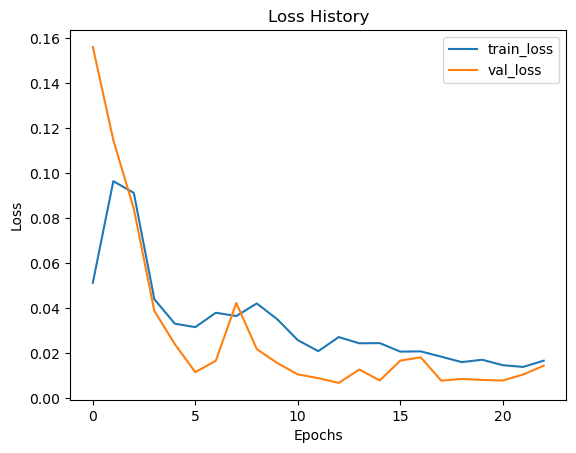

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

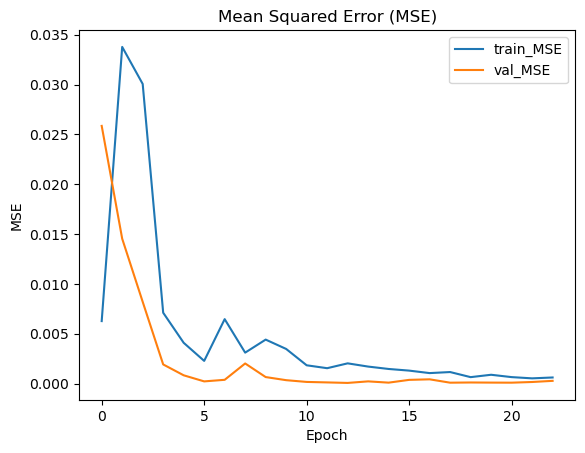

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

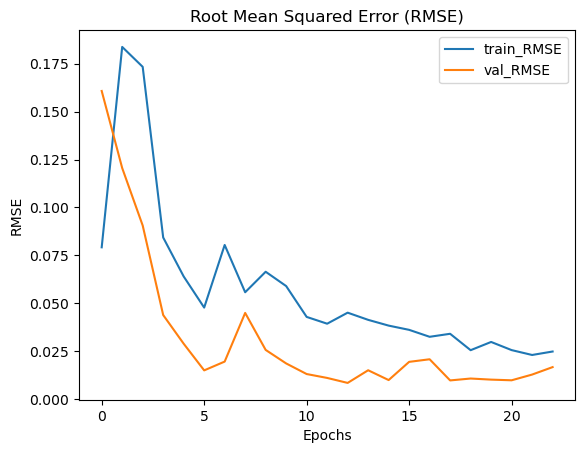

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

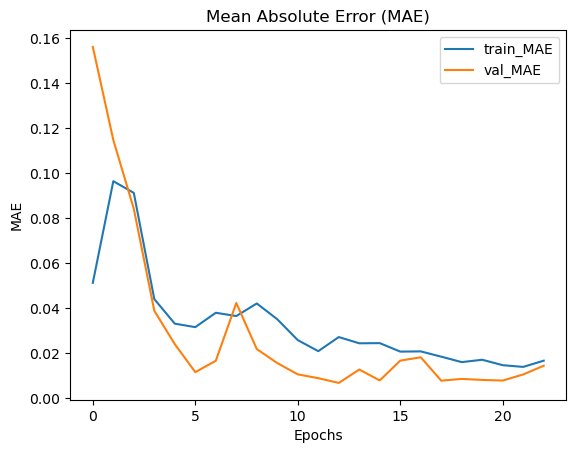

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

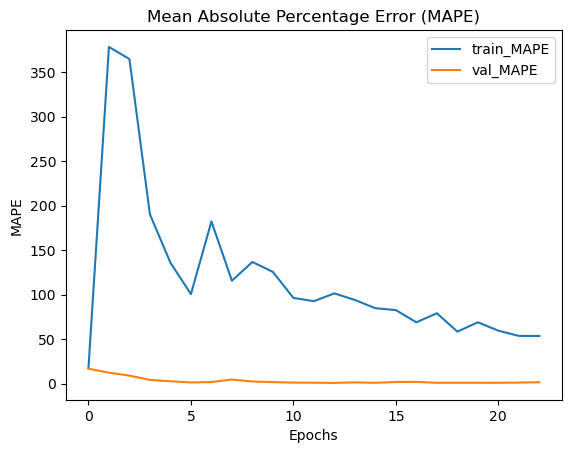

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:28:26.067088: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


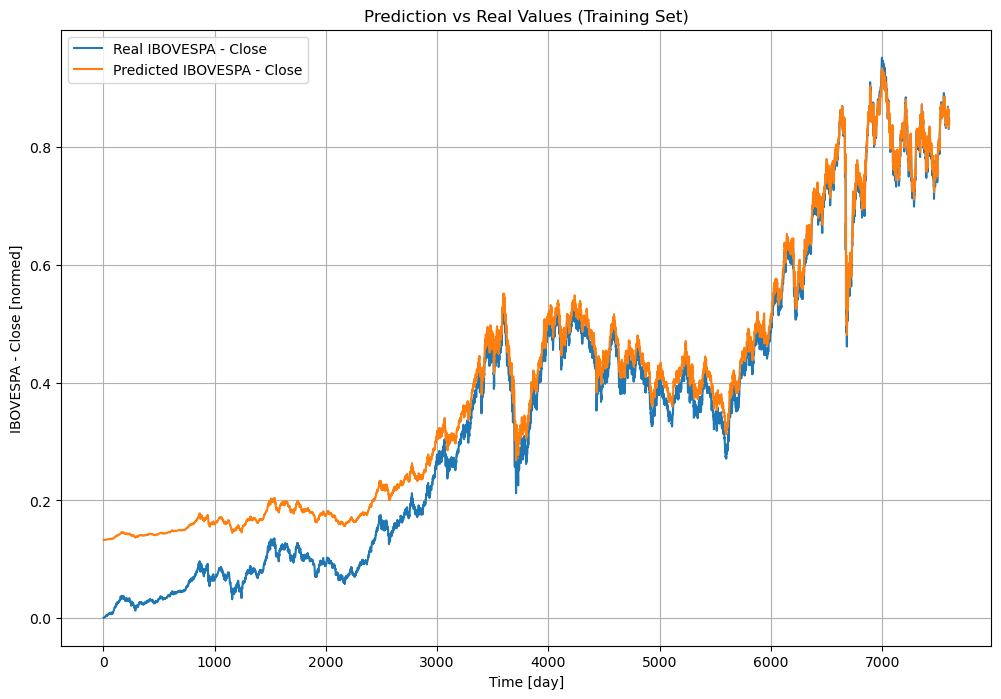

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


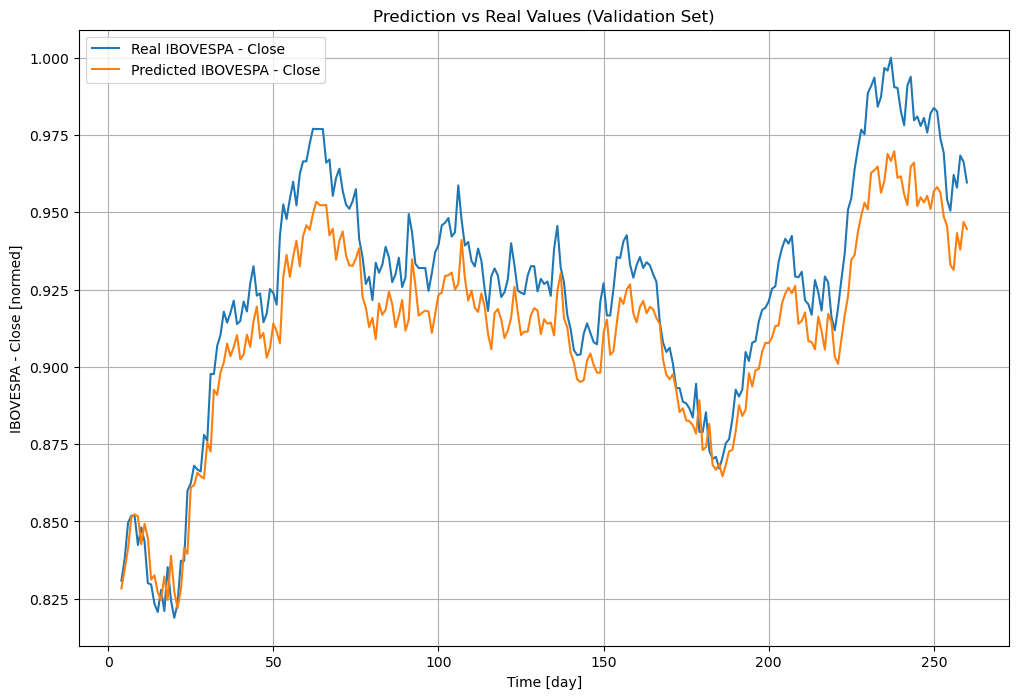

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


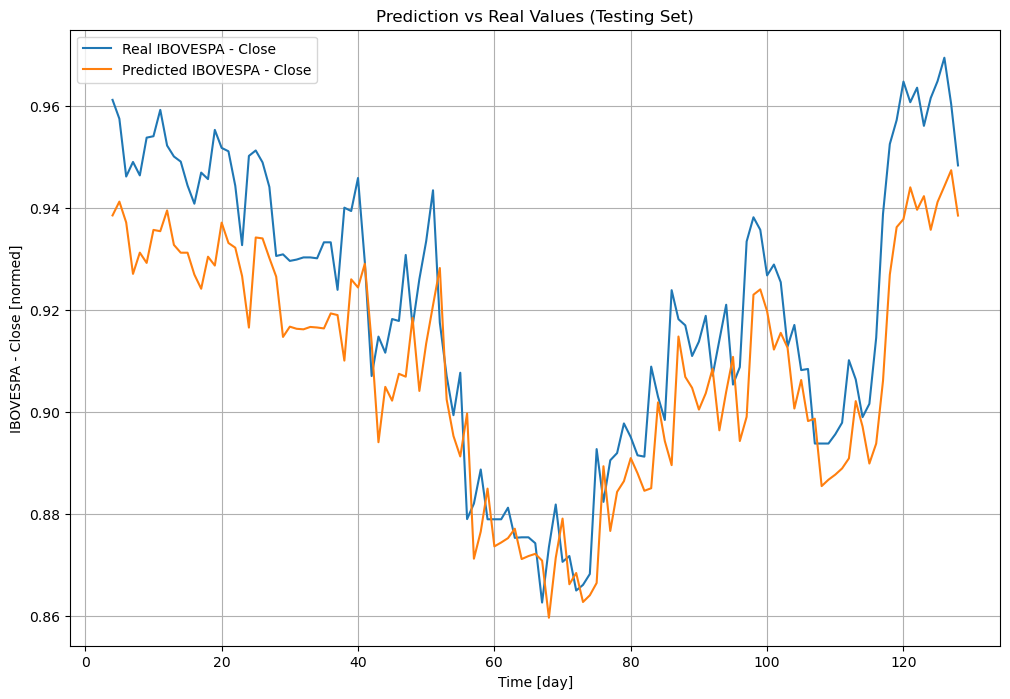

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

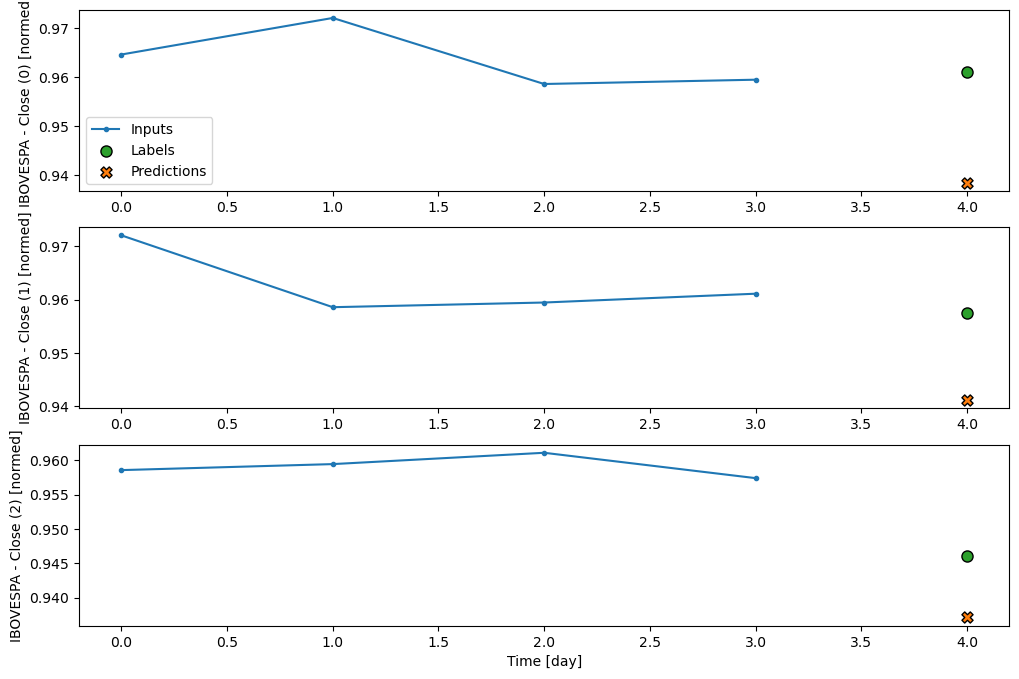

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:6s:533ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


array([[[0.93848413, 0.93848413, 0.93848413, ..., 0.93848413,
         0.93848413, 0.93848413]],

       [[0.9411871 , 0.9411871 , 0.9411871 , ..., 0.9411871 ,
         0.9411871 , 0.9411871 ]],

       [[0.9371011 , 0.9371011 , 0.9371011 , ..., 0.9371011 ,
         0.9371011 , 0.9371011 ]],

       ...,

       [[0.9441914 , 0.9441914 , 0.9441914 , ..., 0.9441914 ,
         0.9441914 , 0.9441914 ]],

       [[0.9473366 , 0.9473366 , 0.9473366 , ..., 0.9473366 ,
         0.9473366 , 0.9473366 ]],

       [[0.93845683, 0.93845683, 0.93845683, ..., 0.93845683,
         0.93845683, 0.93845683]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')